# Course Project - Car Dataset - Interpretation

Dataset ref: https://www.kaggle.com/hellbuoy/car-price-prediction/download

## Sections required in your report:

1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

2. Brief description of the data set you chose and a summary of its attributes.

3. Brief summary of data exploration and actions taken for data cleaning and feature engineering.

4. Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

5. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

6. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

# Background of this project:
- This is only a part of real-world dataset for analysis.
- A car company (Geely Auto) is going to enter US market and to gain competitives. 
- Geely havs contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market.Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.\

- As an analyst, I'm going to report my findings and insights to Geely's management which they may concerns and help to make business decisions in future:
     - Which variables are significant in predicting the price of a car
     - How well those variables describe the price of a car 
     - features interpretation and comparison

## Main objective - Interpretation

This analysis which specifies the models will be focused on interpretation.

## Brief description of dataset

### Import libraries and dataset

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,Ridge, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
datapath = ['Data']
filepath = os.sep.join(datapath + ['CarPrice_Assignment.csv'])
data = pd.read_csv(filepath)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

This dataset is only a part of original dataset.\
It has 205 rows (observations), and 26 columns.\
'price' is the target variable.\
10 columns are categorial features, and 16 columns are numberical features.

# EDA 

## data cleaning

In [6]:
data.isnull().sum() #checking null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#check skewness
data.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [26]:
data.head() #check each column and find car_ID, CarName have no use

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
#drop car_ID, CarName column
df = data.copy()
df.drop(['car_ID','CarName'],axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## divide categorical columns and numerical columns

In [9]:
# divide method1
df_cat = ['fueltype', 'aspiration', 'doornumber',\
          'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem']

In [18]:
# divide metho2
mask = df.dtypes == np.object
df_cat = df.columns[mask]
df_cat

<ipython-input-18-aefbe38b3dcd>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df.dtypes == np.object


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [19]:
df_num = []
for i in df.columns:
    if i not in df_cat:
        df_num.append(i)
df_num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## data visualization

In [20]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

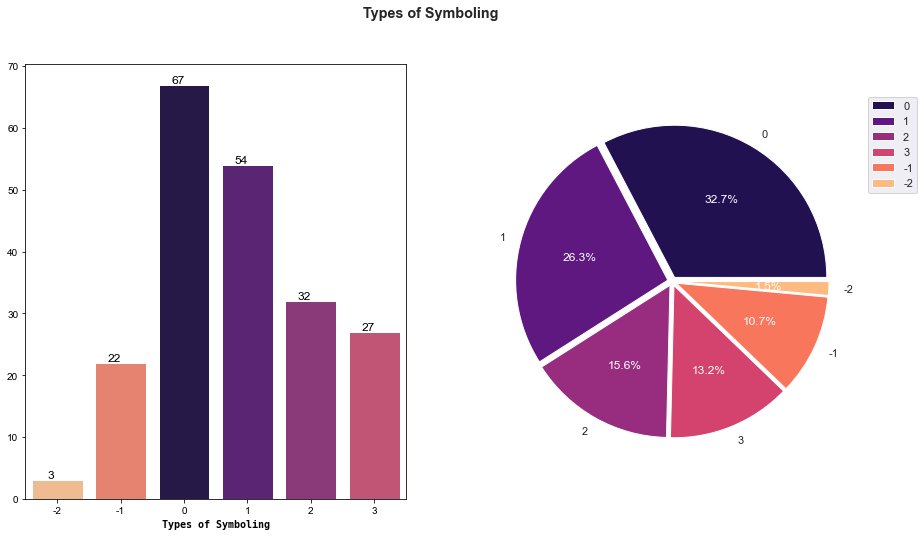

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x1=df['symboling'].value_counts().index
y1=df['symboling'].value_counts().values.tolist()
sym = df.groupby("symboling").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(sym))
rank = sym.argsort().argsort() 
sns.barplot(x=x1,y=y1,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of Symboling', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y1, labels = x1, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['symboling'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Symboling',weight = 'bold')
plt.show()

In [22]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

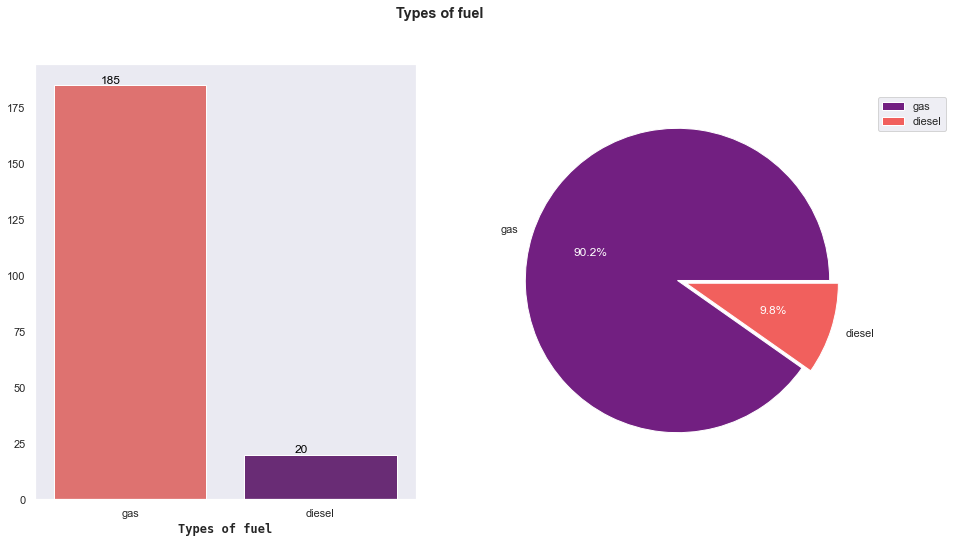

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x2=df['fueltype'].value_counts().index
y2=df['fueltype'].value_counts().values.tolist()
fty = df.groupby("fueltype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(fty))
rank = fty.argsort().argsort() 
sns.barplot(x=x2,y=y2,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of fuel', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y2, labels = x2, colors = pal, autopct='%1.1f%%',
                     explode=[0.03 for i in df['fueltype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of fuel',weight = 'bold')
plt.show()

In [24]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

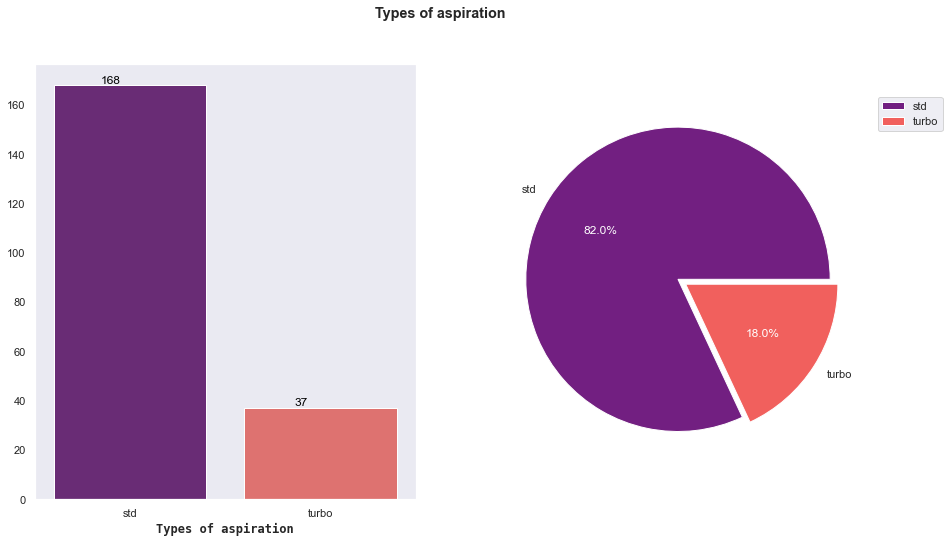

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x3=df['aspiration'].value_counts().index
y3=df['aspiration'].value_counts().values.tolist()
asp = df.groupby("aspiration").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(asp))
rank = asp.argsort().argsort() 
sns.barplot(x=x3,y=y3,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of aspiration', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y3, labels = x3, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['aspiration'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of aspiration',weight = 'bold')
plt.show()

In [26]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

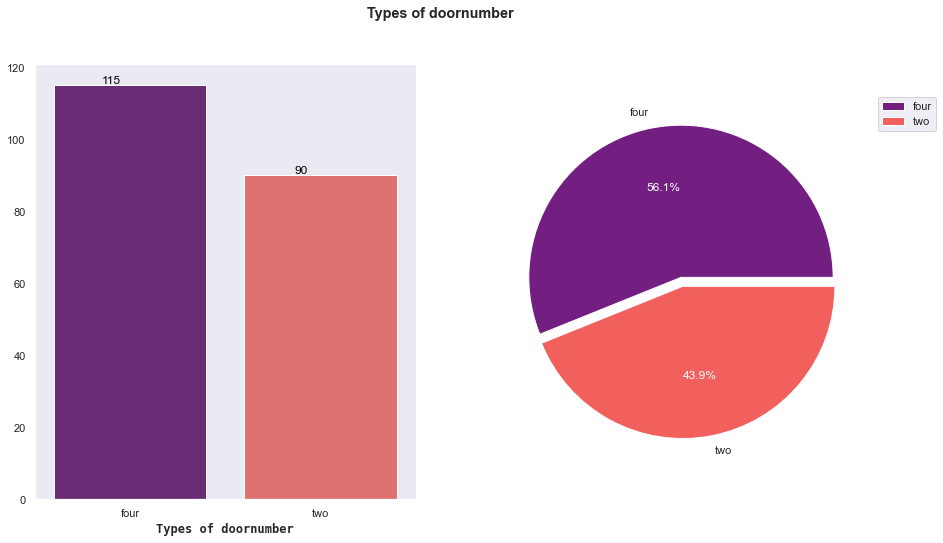

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x4=df['doornumber'].value_counts().index
y4=df['doornumber'].value_counts().values.tolist()
dor = df.groupby("doornumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(dor))
rank = dor.argsort().argsort() 
sns.barplot(x=x4,y=y4,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of doornumber', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y4, labels = x4, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['doornumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of doornumber',weight = 'bold')
plt.show()

#### df.carbody.value_counts()

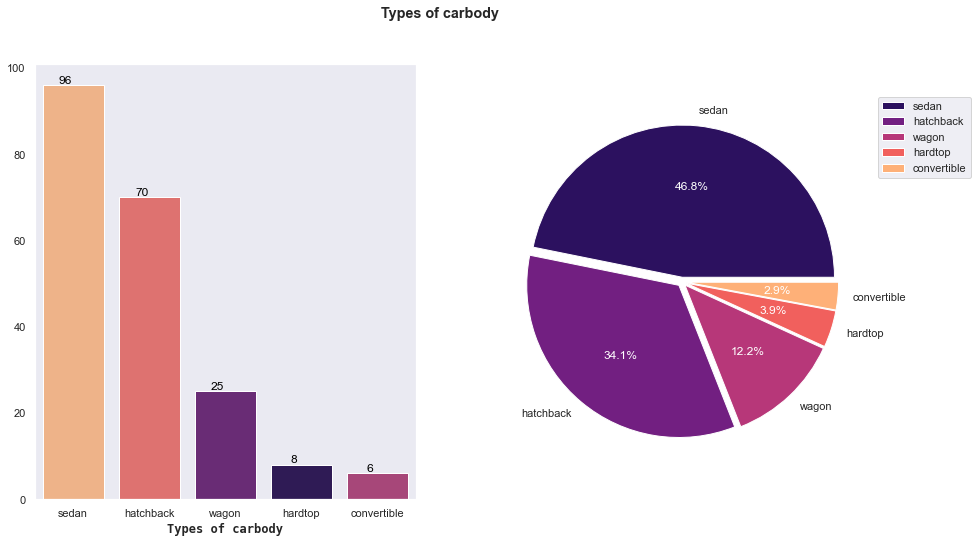

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x5=df['carbody'].value_counts().index
y5=df['carbody'].value_counts().values.tolist()
cab = df.groupby("carbody").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(cab))
rank = cab.argsort().argsort() 
sns.barplot(x=x5,y=y5,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of carbody', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y5, labels = x5, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['carbody'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of carbody',weight = 'bold')
plt.show()

In [30]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

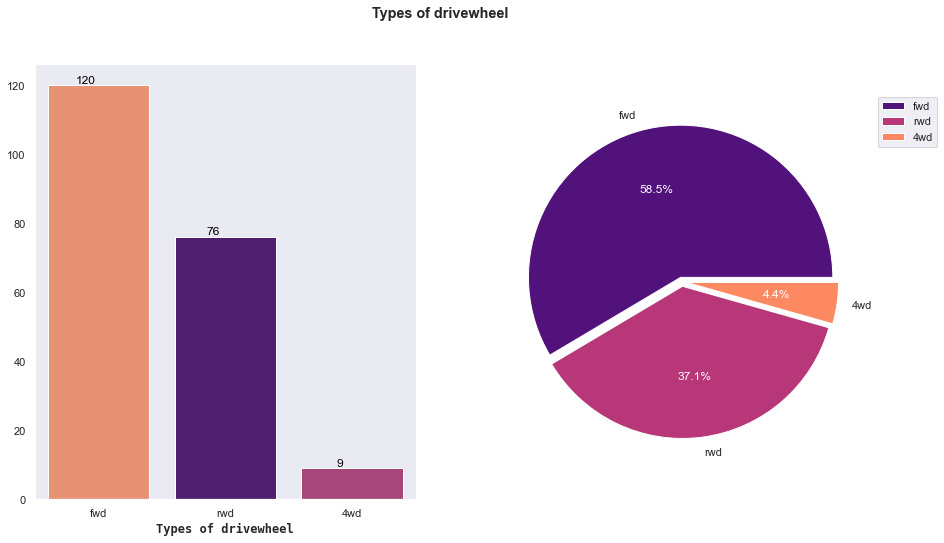

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x6=df['drivewheel'].value_counts().index
y6=df['drivewheel'].value_counts().values.tolist()
drw = df.groupby("drivewheel").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(drw))
rank = drw.argsort().argsort() 
sns.barplot(x=x6,y=y6,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of drivewheel', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y6, labels = x6, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['drivewheel'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of drivewheel',weight = 'bold')
plt.show()

In [32]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

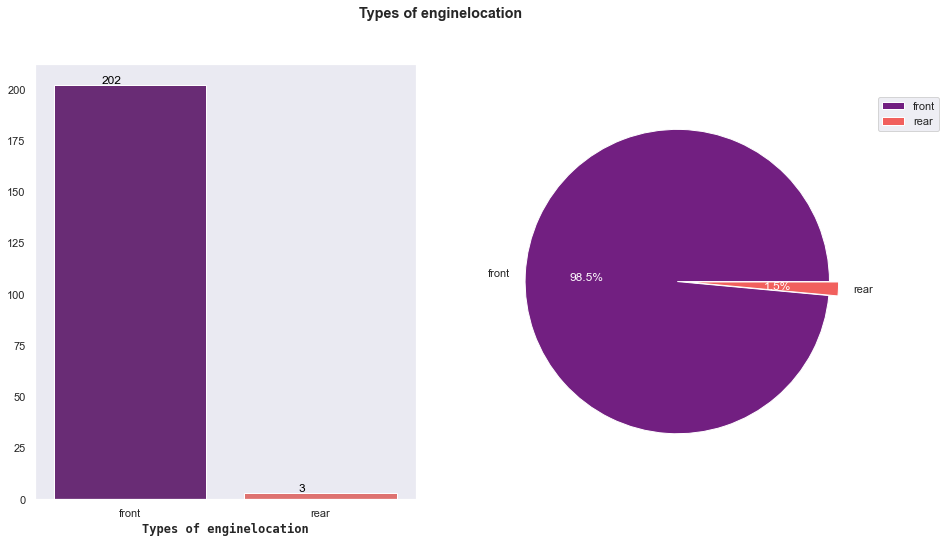

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x7=df['enginelocation'].value_counts().index
y7=df['enginelocation'].value_counts().values.tolist()
eng = df.groupby("enginelocation").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(eng))
rank = eng.argsort().argsort() 
sns.barplot(x=x7,y=y7,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of enginelocation', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y7, labels = x7, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['enginelocation'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of enginelocation',weight = 'bold')
plt.show()

In [34]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

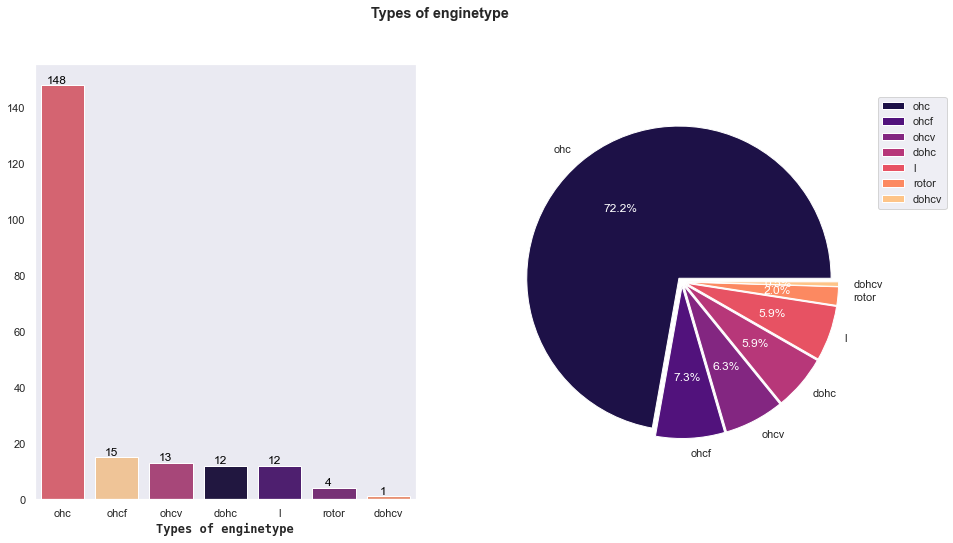

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x8=df['enginetype'].value_counts().index
y8=df['enginetype'].value_counts().values.tolist()
ent = df.groupby("enginetype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(ent))
rank = ent.argsort().argsort() 
sns.barplot(x=x8,y=y8,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of enginetype', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y8, labels = x8, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['enginetype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of enginetype',weight = 'bold')
plt.show()

In [36]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

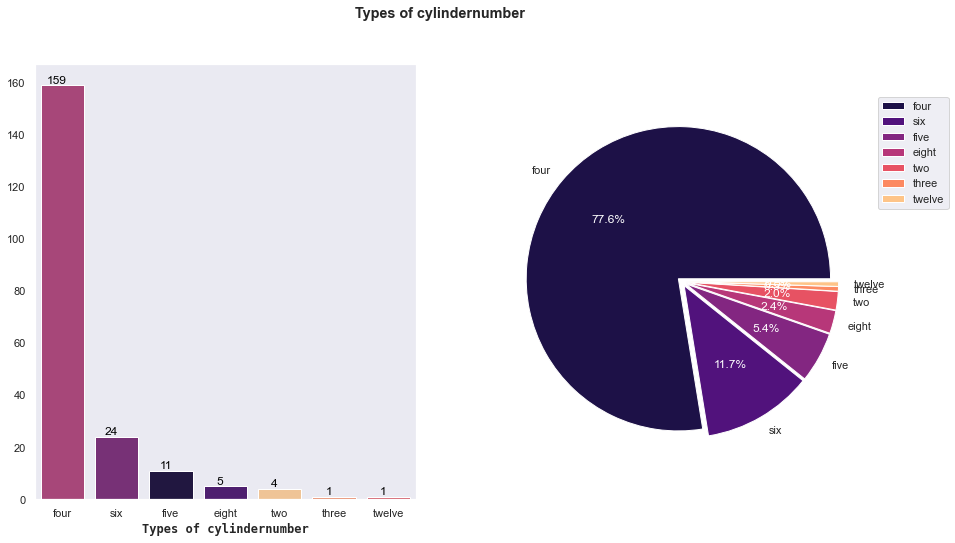

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x9=df['cylindernumber'].value_counts().index
y9=df['cylindernumber'].value_counts().values.tolist()
cyl = df.groupby("cylindernumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(cyl))
rank = cyl.argsort().argsort() 
sns.barplot(x=x9,y=y9,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of cylindernumber', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y9, labels = x9, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['cylindernumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of cylindernumber',weight = 'bold')
plt.show()

In [38]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

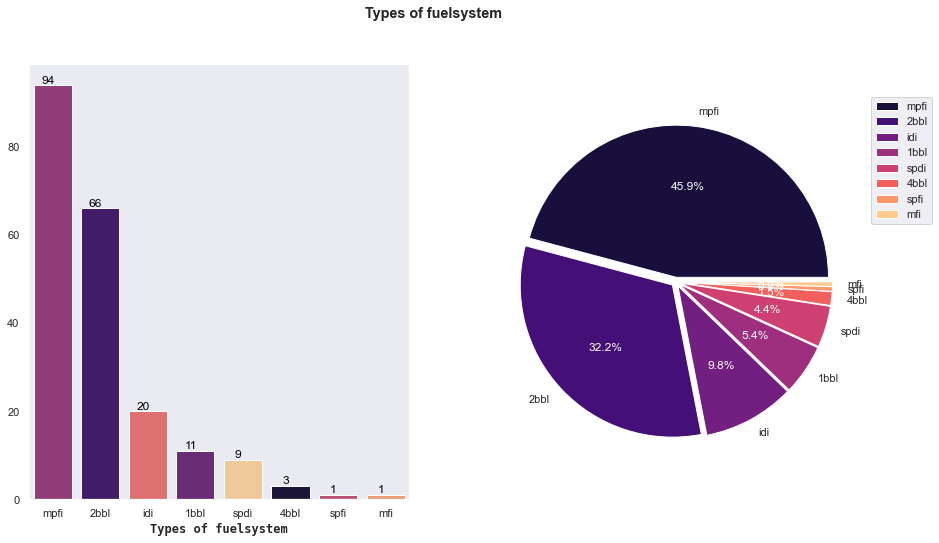

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x10=df['fuelsystem'].value_counts().index
y10=df['fuelsystem'].value_counts().values.tolist()
fus = df.groupby("fuelsystem").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(fus))
rank = fus.argsort().argsort() 
sns.barplot(x=x10,y=y10,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of fuelsystem', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y10, labels = x10, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['fuelsystem'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of fuelsystem',weight = 'bold')
plt.show()

In [40]:
df[df_num]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


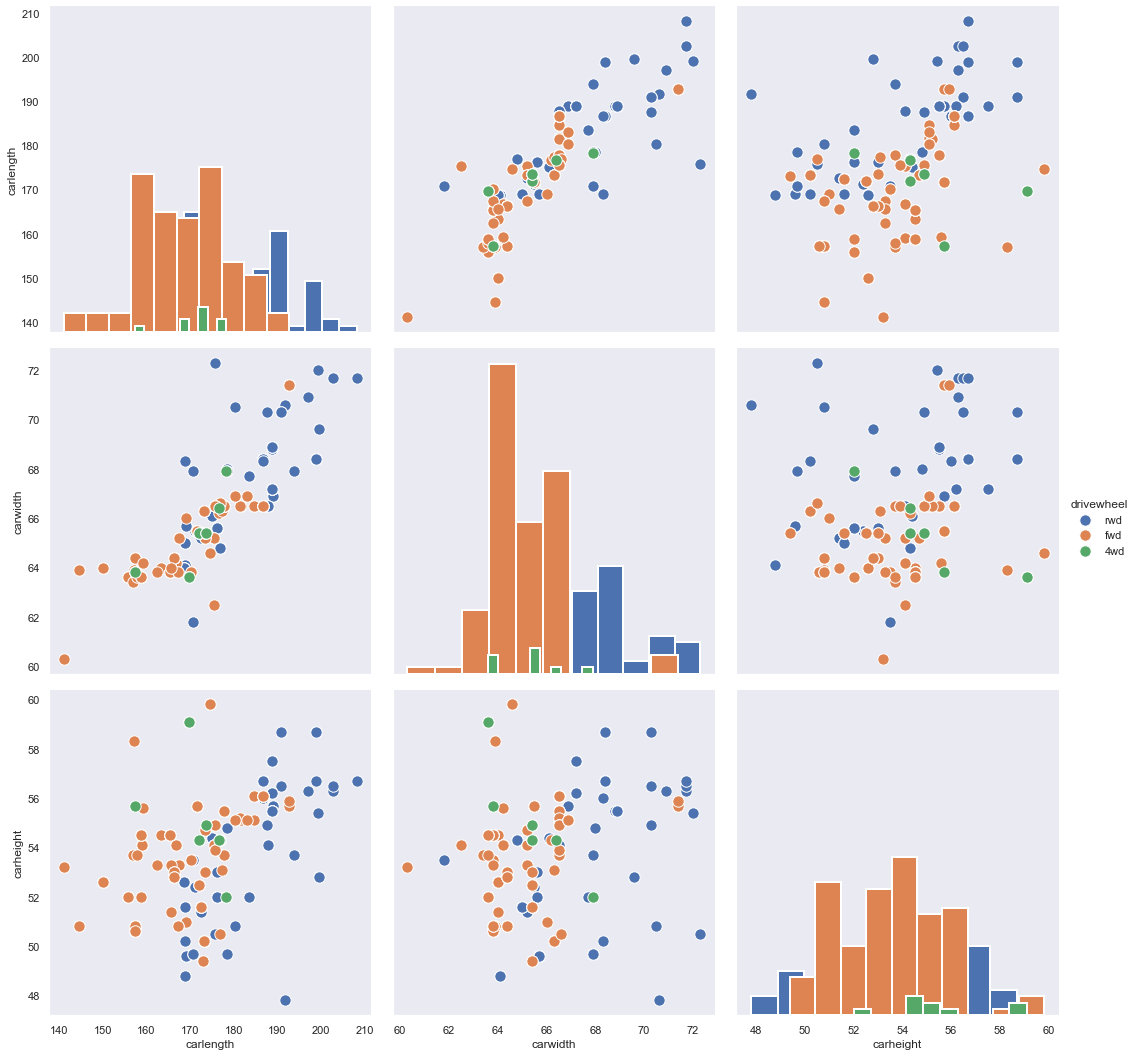

In [41]:
# Plot a subset of variables
g = sns.PairGrid(df , hue='drivewheel' ,vars=["carlength" , "carwidth","carheight"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

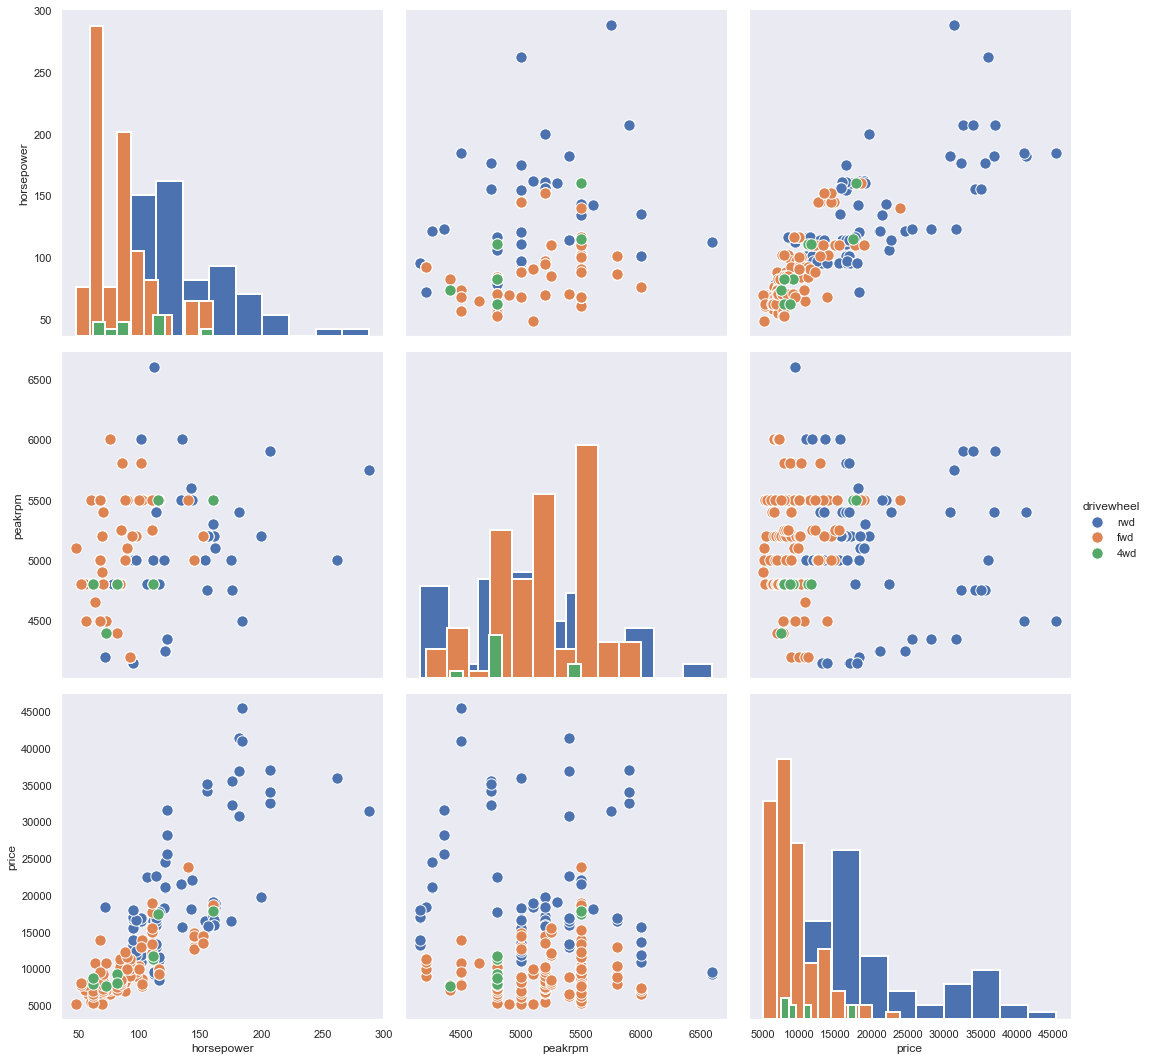

In [105]:
# Plot a subset of variables
g = sns.PairGrid(df , hue='drivewheel' ,vars=["horsepower","peakrpm","price"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

# Features engineering

## one-hot encoding (ohc)

In [42]:
df.shape

(205, 24)

In [43]:
# Determine how many extra columns would be created
num_ohc_cols = (df[df_cat]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

29

In [53]:
num_ohc_cols.sum() - num_ohc_cols.count() #cols goint to one-hot encoding - num of these cols = net added cols 

29

In [54]:
num_ohc_cols.index

Index(['fuelsystem', 'enginetype', 'cylindernumber', 'carbody', 'drivewheel',
       'fueltype', 'aspiration', 'doornumber', 'enginelocation'],
      dtype='object')

In [55]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
df_ohc = df.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(df_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    df_ohc = df_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=df_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    df_ohc = pd.concat([df_ohc, new_df], axis=1)

<ipython-input-55-1ef26b08db73>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(df_ohc[col]).astype(np.int)
<ipython-input-55-1ef26b08db73>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in

In [47]:
df_ohc

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,drivewheel_1,drivewheel_2,fueltype_0,fueltype_1,aspiration_0,aspiration_1,doornumber_0,doornumber_1,enginelocation_0,enginelocation_1
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [56]:
# Column difference is as calculated above
df_ohc.shape[1] - df.shape[1]

29

In [57]:
print(df.shape[1])

# Remove the string columns from the dataframe
df1 = df.drop(num_ohc_cols.index, axis=1)

print(df1.shape[1])

24
15


In [50]:
df_ohc.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3',
       'fuelsystem_4', 'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7',
       'enginetype_0', 'enginetype_1', 'enginetype_2', 'enginetype_3',
       'enginetype_4', 'enginetype_5', 'enginetype_6', 'cylindernumber_0',
       'cylindernumber_1', 'cylindernumber_2', 'cylindernumber_3',
       'cylindernumber_4', 'cylindernumber_5', 'cylindernumber_6', 'carbody_0',
       'carbody_1', 'carbody_2', 'carbody_3', 'carbody_4', 'drivewheel_0',
       'drivewheel_1', 'drivewheel_2', 'fueltype_0', 'fueltype_1',
       'aspiration_0', 'aspiration_1', 'doornumber_0', 'doornumber_1',
       'enginelocation_0', 'enginelocation_1'],
      dtype='object')

## train_test_split, discuss ohc

In [58]:
y_col='price'

In [59]:
feature_cols1 = [x for x in df1.columns if x!= y_col]
X_df = df1[feature_cols1]
y_df = df1[y_col]

feature_cols2 = [x for x in df_ohc.columns if x!=y_col]
X_ohc = df_ohc[feature_cols2]
y_ohc = df_ohc[y_col]

In [60]:
X_train,X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=35)
X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_ohc, y_ohc, test_size=0.3, random_state=35)

In [61]:
(X_train.index == X_train_ohc.index).all()

True

In [ ]:
#Use LR to check whether one-hot encoding is necessary
LR = LinearRegression()

error = list()

LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error.append(pd.Series({'train':mean_squared_error(y_train, y_train_pred),
                          'test':mean_squared_error(y_test,y_test_pred)},name = 'no ohc'))

LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error.append(pd.Series({'train':mean_squared_error(y_train_ohc, y_train_ohc_pred),
                          'test':mean_squared_error(y_test_ohc,y_test_ohc_pred)},name = 'ohc'))

error_df = pd.concat(error, axis=1)
error_df

In [63]:
from sklearn.metrics import r2_score

r2_error = list()
r2_error.append(pd.Series({'train':r2_score(y_train, y_train_pred),
                          'test':r2_score(y_test,y_test_pred)},name = 'no ohc'))
r2_error.append(pd.Series({'train':r2_score(y_train_ohc, y_train_ohc_pred),
                          'test':r2_score(y_test_ohc,y_test_ohc_pred)},name = 'ohc'))
r2_error_df = pd.concat(r2_error,axis=1)

r2_error_df

,no ohc,ohc
train,0.847043,0.939479
test,0.828886,0.898425


Scores have not much differences. And One-hot encoding labels are easy to overfitting. Let's try another label encoding!

## label encoding is better

In [64]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df2 = df.copy()
df2["fueltype"] = label.fit_transform(df2["fueltype"])
df2["aspiration"] = label.fit_transform(df2["aspiration"])
df2["doornumber"] = label.fit_transform(df2["doornumber"])
df2["carbody"] = label.fit_transform(df2["carbody"])
df2["drivewheel"] = label.fit_transform(df2["drivewheel"])
df2["enginelocation"] = label.fit_transform(df2["enginelocation"])
df2["enginetype"] = label.fit_transform(df2["enginetype"])
df2["cylindernumber"] = label.fit_transform(df2["cylindernumber"])
df2["fuelsystem"] = label.fit_transform(df2["fuelsystem"])

In [211]:
df2[["fueltype","aspiration","doornumber","carbody","drivewheel",
     "enginelocation","enginetype","cylindernumber","fuelsystem"]]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,0,1,0,2,0,0,2,5
1,1,0,1,0,2,0,0,2,5
2,1,0,1,2,2,0,5,3,5
3,1,0,0,3,1,0,3,2,5
4,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,3,2,5
201,1,1,0,3,2,0,3,2,5
202,1,0,0,3,2,0,5,3,5
203,0,1,0,3,2,0,3,3,3


In [212]:
df[["fueltype","aspiration","doornumber","carbody","drivewheel",
     "enginelocation","enginetype","cylindernumber","fuelsystem"]]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [66]:
y_df2 = df2[y_col]
features = [x for x in df2.columns if x!= y_col]
X_df2 = df2[features]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_df2, y_df2, random_state=35, test_size=0.3)

In [68]:
LR.fit(X_train, y_train)
y_pred0 = LR.predict(X_test)
r2_score(y_test, y_pred0) 

0.8570485763956794

In [69]:
r2_score(y_train,LR.predict(X_train))

0.8697039382030657

No standard scale process, just doing the label encoding, the scores are just slightly small than ohc.\
But after label encoding and standard scaling processes, it's better than one-hot encoding!

In [70]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_train_st = st.fit_transform(X_train)

LR.fit(X_train_st, y_train)

y_pred = LR.predict(st.transform(X_test))
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred))) #scalor has no difference in LR

0.8570485763956802
3360.138448116173


## Correlations between features

<AxesSubplot:>

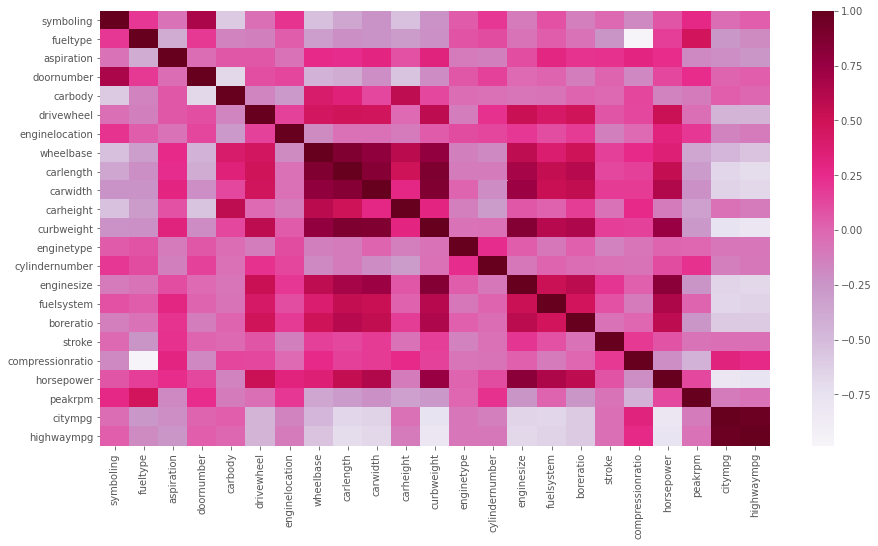

In [169]:
plt.figure(figsize=(15,8))
sns.heatmap(X_df2.corr(),cmap='PuRd')

## Stats - Variance Inflation Factor

In [72]:
#importing varience inflation factor from the stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif_data=X_df2
## calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling              4.088076
fueltype             801.869807
aspiration             3.461189
doornumber             5.000804
carbody               28.635479
drivewheel            17.102140
enginelocation         1.756087
wheelbase           2920.130535
carlength           2360.482629
carwidth            5879.924809
carheight           1255.495605
curbweight           475.771264
enginetype            14.725128
cylindernumber        16.421138
enginesize           137.152566
fuelsystem             8.607494
boreratio            324.326148
stroke               165.096056
compressionratio     575.023405
horsepower           112.264835
peakrpm              303.744416
citympg              522.786019
highwaympg           588.182615
dtype: float64

**statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)**
Variance inflation factor, VIF, for one exogenous variable

- The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. 
**It is a measure for multicollinearity of the design matrix, exog.**

- **One recommendation is that if VIF is greater than 5**, then the explanatory variable given \
by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [74]:
#drop the vif>5 columns
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [75]:
vif_data=X_df2
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()b

carwidth has been removed
carlength has been removed
wheelbase has been removed
carheight has been removed
highwaympg has been removed
fueltype has been removed
curbweight has been removed
peakrpm has been removed
boreratio has been removed
stroke has been removed


,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,citympg
0,3,0,1,0,2,0,0,2,130,5,9.0,111,21
1,3,0,1,0,2,0,0,2,130,5,9.0,111,21
2,1,0,1,2,2,0,5,3,152,5,9.0,154,19
3,2,0,0,3,1,0,3,2,109,5,10.0,102,24
4,2,0,0,3,0,0,3,1,136,5,8.0,115,18


In [77]:
vif_data.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,citympg
0,3,0,1,0,2,0,0,2,130,5,9.0,111,21
1,3,0,1,0,2,0,0,2,130,5,9.0,111,21
2,1,0,1,2,2,0,5,3,152,5,9.0,154,19
3,2,0,0,3,1,0,3,2,109,5,10.0,102,24
4,2,0,0,3,0,0,3,1,136,5,8.0,115,18


In [78]:
X_new = vif_data
X_new.shape

(205, 13)

In [79]:
y_new = y_df2.copy()
y_new.shape

(205,)

After VIF test, return 13 cols left. Original data has 23 cols. 10 cols are irrelevant.\
Following model selection will use X_new (13 cols) to test. \
And find out the optimal model to interpret those features significantly impact the price (y variable).

# Model selection

## Linear Regression - KFold CV

In [82]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
kf.split(X_new)

<generator object _BaseKFold.split at 0x7ff5eda27430>

In [83]:
for train_index, test_index in kf.split(X_new):
    print(len(train_index),len(test_index))

136 69
137 68
137 68


In [84]:
train_index

array([  0,   1,   3,   4,   5,   6,   8,   9,  11,  15,  16,  17,  19,
        21,  22,  25,  26,  27,  29,  30,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  44,  46,  49,  50,  53,  54,  55,  56,  57,
        59,  61,  62,  63,  69,  70,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  86,  89,  90,  91,  92,  94,  95,  97,
        98,  99, 100, 101, 102, 105, 108, 109, 110, 111, 112, 114, 116,
       117, 118, 120, 122, 123, 125, 126, 127, 128, 130, 131, 133, 134,
       135, 138, 139, 141, 142, 147, 148, 149, 151, 152, 155, 156, 158,
       162, 163, 165, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192,
       193, 194, 195, 198, 201, 202, 204])

In [170]:
X_new.shape

(205, 13)

In [86]:
X_train, X_test, y_train, y_test = (X_new.iloc[train_index, :], 
                                        X_new.iloc[test_index, :], 
                                        y_new[train_index], 
                                        y_new[test_index])

In [87]:
LR = LinearRegression(normalize=True)
LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR_score = r2_score(y_test, y_pred)
print("R2 score:",LR_score)
print("Rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.7499389903023687
Rmse: 3691.004095449222


Score is lower. Since the data size is pretty small. It is not prefer using KFold instead of directly train_test_split.

## Linear Regression - Baseline

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=100, test_size=0.3)
LR = LinearRegression(normalize=True)
LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR_score = r2_score(y_test, y_pred)
print("R2 score:",LR_score)
print("Rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.8542984272640753
Rmse: 3194.2682245115466


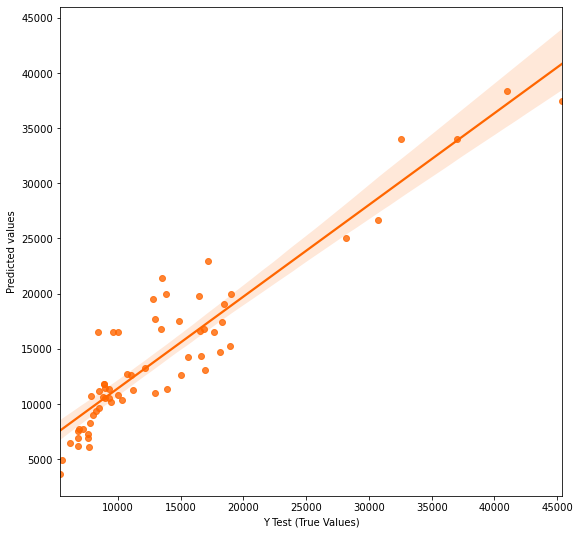

In [89]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test,y = y_pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [90]:
df_LR_Coef = pd.DataFrame({'Column':X_new.columns,'Coefficients':LR.coef_})
df_LR_Coef = df_LR_Coef.sort_values(by="Coefficients")
df_LR_Coef

,Column,Coefficients
2,doornumber,-680.404373
7,cylindernumber,-546.673012
12,citympg,-208.465137
9,fuelsystem,-124.911725
3,carbody,-5.423094
11,horsepower,46.943155
0,symboling,53.597732
8,enginesize,89.928537
10,compressionratio,271.006215
6,enginetype,344.565491


Text(0.5, 1.0, 'Normalized Linear Regression coefficients')

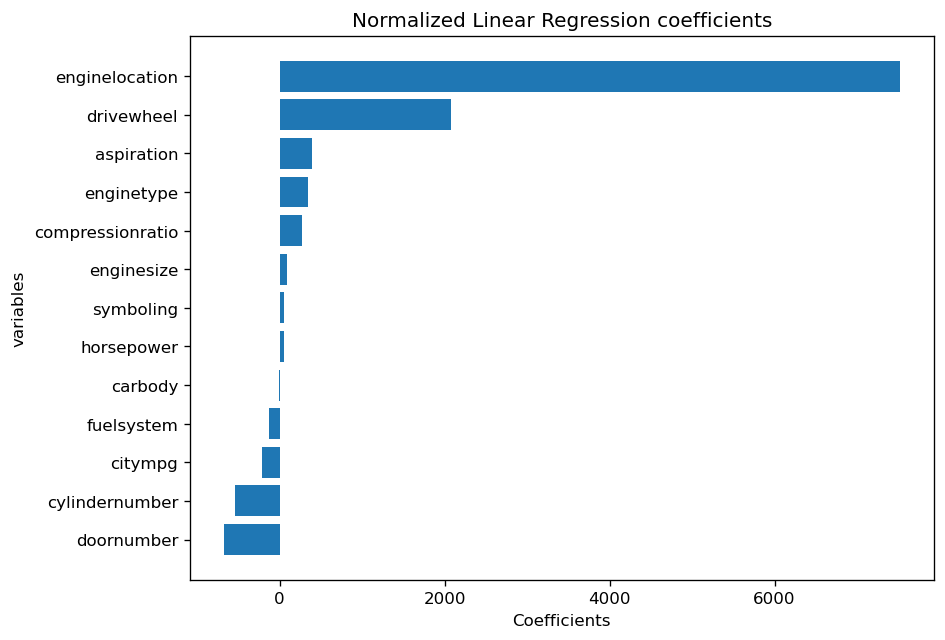

In [91]:
plt.figure(figsize=(8,6),dpi=120)
x=df_LR_Coef['Column']
y=df_LR_Coef['Coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Normalized Linear Regression coefficients")

## Lasso Regression

In [172]:
alphas = np.geomspace(1e-5, 2, num=10)

las = Lasso()
scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)  #higher alpha, less complexity of lasso

    las = las.fit(X_train, y_train)
    
    las_pred = las.predict(X_test)
    
    score = r2_score(y_test, las_pred)
    
    scores.append(score)

In [173]:
list(zip(alphas,scores))

[(1e-05, 0.8542984262399432),
 (3.881533447356427e-05, 0.8542984232890614),
 (0.0001506630190294667, 0.8542984118341205),
 (0.0005848035476425735, 0.8542983671666096),
 (0.0022699345303073466, 0.8542981942045419),
 (0.008810826802697267, 0.8542975221800063),
 (0.034199518933533964, 0.8542949066967883),
 (0.1327465766240115, 0.8542846444588865),
 (0.5152602771881635, 0.8542429842638284),
 (2.0, 0.8540535213159686)]

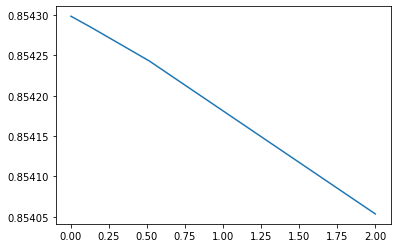

In [97]:
plt.plot(alphas, scores)

In [174]:
lasso_score = Lasso(alpha=0.1).fit(X_train,y_train).score(X_test,y_test)
lasso_score

0.8542880747260234

In [176]:
df_lasso_Coef = pd.DataFrame({"Column":X_new.columns,"Coefficients":Lasso(alpha=0.1).fit(X_train,y_train).coef_})
df_lasso_Coef = df_lasso_Coef.sort_values(by="Coefficients")

Text(0.5, 1.0, 'Lasso coefficients')

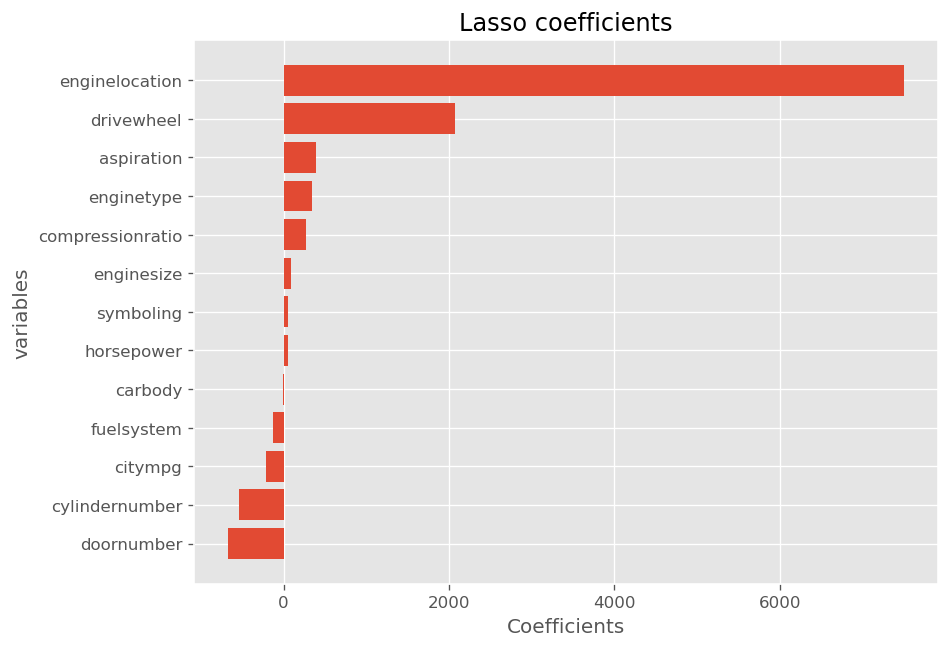

In [177]:
plt.figure(figsize=(8,6),dpi=120)
x=df_lasso_Coef['Column']
y=df_lasso_Coef['Coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Lasso coefficients")

## Ridge Regression

In [178]:
alphas = np.geomspace(1e-5, 1, num=10)
alphas

scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)  #higher alpha, less complexity of lasso

    ridge = ridge.fit(X_train, y_train)
    
    ridge_pred = ridge.predict(X_test)
    
    score = r2_score(y_test, ridge_pred)
    
    scores.append(score)

In [179]:
list(zip(alphas,scores))

[(1e-05, 0.85429835867874),
 (3.5938136638046256e-05, 0.8542981807643468),
 (0.0001291549665014884, 0.8542975411728958),
 (0.0004641588833612782, 0.8542952400170605),
 (0.0016681005372000592, 0.8542869368787052),
 (0.005994842503189409, 0.8542566749645788),
 (0.021544346900318846, 0.8541427809414431),
 (0.07742636826811278, 0.8536797502804218),
 (0.2782559402207126, 0.851699916069423),
 (1.0, 0.8454899383225617)]

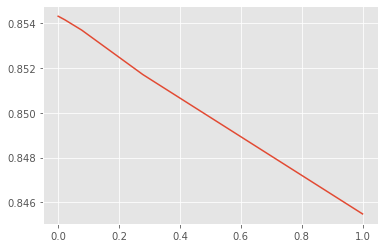

In [180]:
plt.plot(alphas, scores)

In [181]:
Ridge(alpha=0.01).fit(X_train, y_train).coef_

array([ 5.43486394e+01,  3.93862101e+02, -6.82138662e+02, -6.64290456e+00,
        2.07078885e+03,  7.43394102e+03,  3.45094523e+02, -5.46684163e+02,
        8.99049792e+01, -1.25092839e+02,  2.71254147e+02,  4.70411613e+01,
       -2.08340261e+02])

In [182]:
Ridge_score = Ridge(alpha=0.01).fit(X_train,y_train).score(X_test,y_test)
Ridge_score

0.8542280893473224

In [183]:
df_ridge_Coef = pd.DataFrame({"Column":X_new.columns,"Coefficients":Ridge(alpha=0.01).fit(X_train, y_train).coef_})
df_ridge_Coef = df_ridge_Coef.sort_values(by="Coefficients")

Text(0.5, 1.0, 'Ridge Regression coefficients')

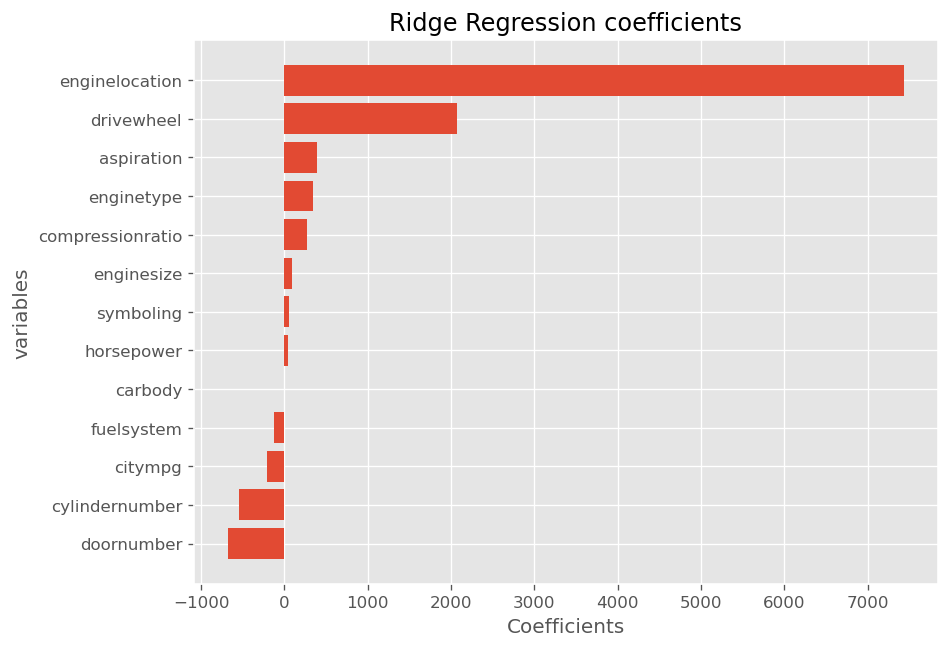

In [184]:
plt.figure(figsize=(8,6),dpi=120)
x=df_ridge_Coef['Column']
y=df_ridge_Coef['Coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Ridge Regression coefficients")

## Elastic net

In [185]:
alphas = np.geomspace(1e-8, 0.01, num=10)

scores = []

for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, max_iter=100000)  #higher alpha, less complexity of lasso

    el = elastic.fit(X_train, y_train)
    el_pred = el.predict(X_test)
    
    score = r2_score(y_test, el_pred)
    
    scores.append(score)

In [186]:
list(zip(alphas,scores))

[(1e-08, 0.8542984223598303),
 (4.641588833612782e-08, 0.8542984045004315),
 (2.1544346900318822e-07, 0.8542983216012463),
 (1e-06, 0.8542979367483656),
 (4.641588833612773e-06, 0.8542961489343197),
 (2.1544346900318823e-05, 0.8542878187747118),
 (0.0001, 0.854248480603614),
 (0.00046415888336127724, 0.854052657180771),
 (0.002154434690031882, 0.8529565916390704),
 (0.01, 0.8476095521518453)]

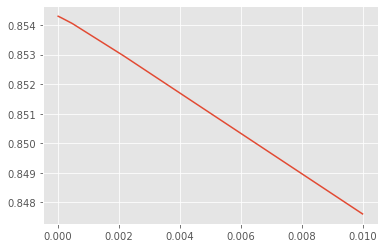

In [187]:
plt.plot(alphas, scores)

In [188]:
ElasticNect_score = ElasticNet(alpha=1e-8).fit(X_train,y_train).score(X_test,y_test)
ElasticNect_score

0.8542984223598303

In [189]:
df_elastic_Coef = pd.DataFrame({"Column":X_new.columns,"Coefficients":ElasticNet(alpha=1e-8).fit(X_train,y_train).coef_})
df_elastic_Coef = df_elastic_Coef.sort_values(by="Coefficients")

Text(0.5, 1.0, 'Elastic Net Regression coefficients')

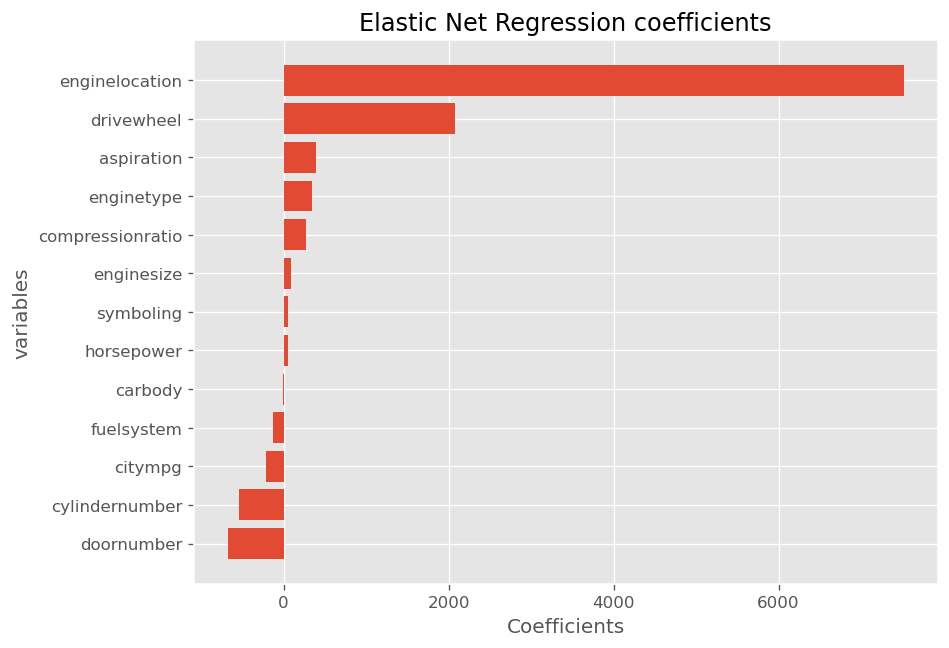

In [190]:
plt.figure(figsize=(8,6),dpi=120)
x=df_elastic_Coef['Column']
y=df_elastic_Coef['Coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Elastic Net Regression coefficients")

## Elastic net + CV + Poly

In [117]:
pf = PolynomialFeatures(degree=2) #make higher degree, test whether more complexity is suitable
kf = KFold(shuffle=True, random_state=35, n_splits=3)
scores = []
alphas = np.geomspace(1,1000,5)

for alpha in alphas:
    
    el2 = ElasticNet(alpha=alpha, max_iter=1000000)
    
    estimator = Pipeline([
        ("make_higher_degree", pf),
        ("elastic_regression", el2)])

    predictions = cross_val_predict(estimator, X_new, y_new, cv = kf)
    
    score = r2_score(y_new, predictions)
    
    scores.append(score)
    

In [118]:
list(zip(alphas,scores))

[(1.0, 0.5087791679941487),
 (5.623413251903491, 0.6412111704521997),
 (31.622776601683793, 0.7299256491882864),
 (177.82794100389228, 0.7675054311389613),
 (1000.0, 0.7539293320359739)]

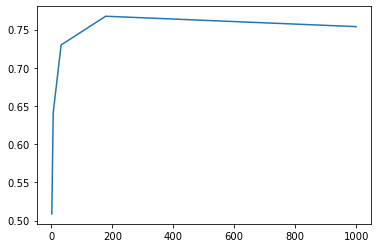

In [119]:
plt.plot(alphas, scores)

Increase complexity of model did not help. Score is lower than before.

## Model comparing

In [120]:
models = pd.DataFrame(index={"LR","Lasso","Ridge","Elastic Net"},
             data = {LR_score,lasso_score,Ridge_score,ElasticNect_score},columns=['test_score'])
models

,test_score
LR,0.854298
Lasso,0.854288
Ridge,0.854298
Elastic Net,0.854228


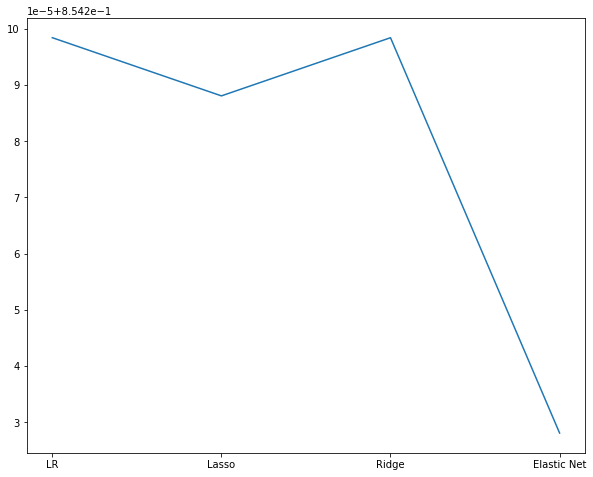

In [122]:
plt.figure(figsize=(10,8))
plt.plot(models.index, models['test_score'])

# Conclusion

 - Comparing to several models, Linear and Ridge regression are preferable.
 - Those features are mostly affecting the Price of car as follows:

In [127]:
df_LR_Coef

,Column,Coefficients
2,doornumber,-680.404373
7,cylindernumber,-546.673012
12,citympg,-208.465137
9,fuelsystem,-124.911725
3,carbody,-5.423094
11,horsepower,46.943155
0,symboling,53.597732
8,enginesize,89.928537
10,compressionratio,271.006215
6,enginetype,344.565491


Text(0.5, 1.0, 'How features impacting the Price')

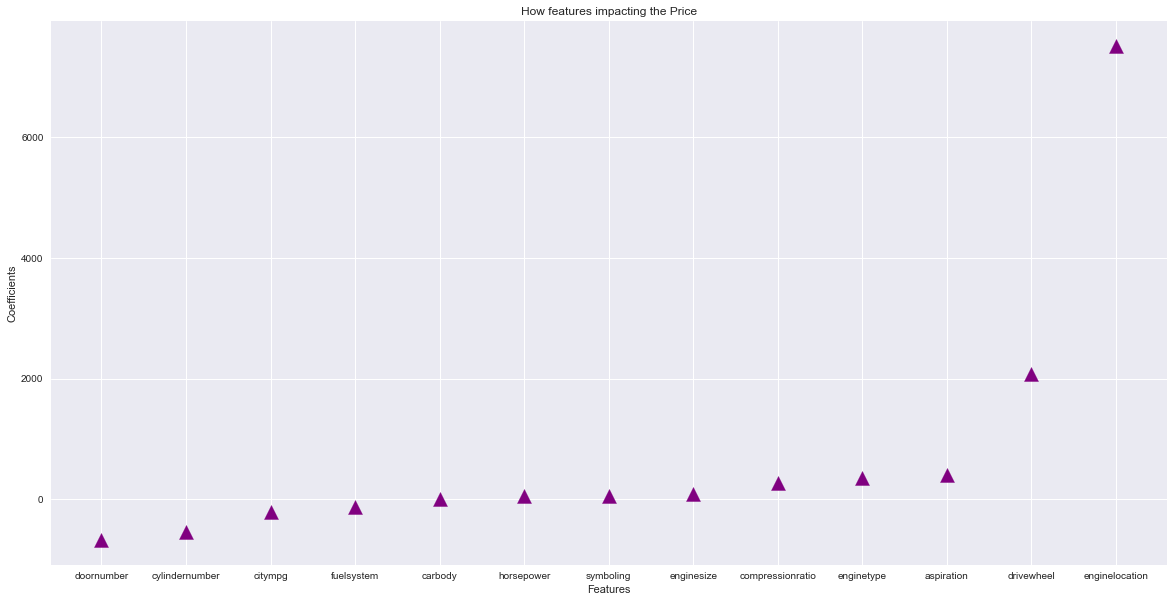

In [192]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.scatter(y=df_LR_Coef["Coefficients"],x=df_LR_Coef["Column"],marker='^',color='purple',s=200)
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title("How features impacting the Price")